# Programming and Data Analysis

> Data Visualization with Matplotlib

Kuo, Yao-Jen <yaojenkuo@ntu.edu.tw> from [DATAINPOINT](https://www.datainpoint.com/)

In [1]:
from datetime import date
from datetime import timedelta
from urllib.error import HTTPError
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## About Matplotlib

## What is `matplotlib`?

> Matplotlib, short for matlab plotting library is a comprehensive library for creating static, animated, and interactive visualizations in Python.

Source: <https://matplotlib.org/>

## Import Matplotlib with `import` command

Matplotlib is officially aliased as `mpl`.

In [2]:
import matplotlib as mpl

## If Matplotlib is not installed, we will encounter a `ModuleNotFoundError`

```
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
ModuleNotFoundError: No module named 'matplotlib'
```

## Use `pip install` at Terminal to install matplotlib

```bash
pip install matplotlib
```

## Check version and its installation file path

- `__version__` attribute
- `__file__` attribute

In [3]:
print(mpl.__version__)
print(mpl.__file__)

3.3.4
/Users/kuoyaojen/opt/miniconda3/envs/pyds/lib/python3.8/site-packages/matplotlib/__init__.py


## We will use `matplotlib.pyplot` through this chapter, which is a plotting module in matplotlib, officially aliased as `plt`

In [4]:
import matplotlib.pyplot as plt

## Why visualization?

> Visualization plays a vital role among exploratory data analysis. Sometimes it is extremely difficult for human to understand raw data, functions, or formulas.

## The abstractness of raw data

In [5]:
arr = np.random.normal(size=10000)
arr

array([ 0.19541706, -1.05237904, -0.44243461, ..., -2.48707639,
        0.92148783, -0.9189607 ])

## The abstractness of functions

\begin{equation}
J(p) = -y_{true}log(p)-(1-y_{true})log(1-p)
\end{equation}

## The abstractness of functions

\begin{equation}
f(x) = \frac{1}{1 + e^{-x}}
\end{equation}

## The concreteness of visualization for raw data

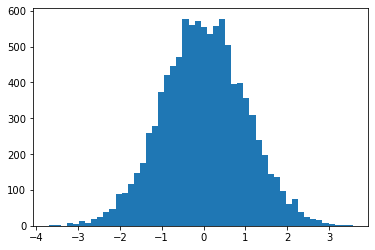

In [6]:
fig = plt.figure()
ax = plt.axes()
ax.hist(arr, bins=50)
plt.show()

## The concreteness of visualization for functions

In [7]:
eps = 1e-06 # epsilon, a tiny number to avoid infinity
p = np.linspace(0 + eps, 1 - eps, 10000)
log_loss_0 = -np.log(1-p)
log_loss_1 = -np.log(p)

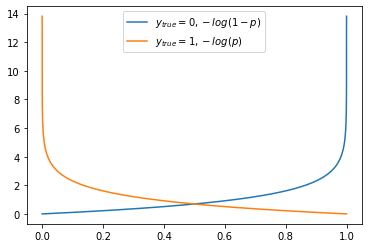

In [8]:
fig = plt.figure()
ax = plt.axes()
ax.plot(p, log_loss_0, label='$y_{true}=0, -log(1-p)$')
ax.plot(p, log_loss_1, label='$y_{true}=1, -log(p)$')
ax.legend()
plt.show()

## The concreteness of visualization for functions

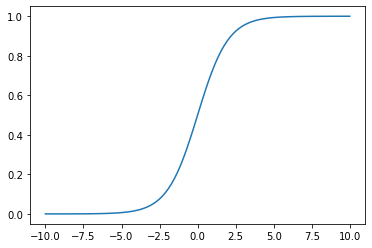

In [9]:
x = np.linspace(-10, 10, 100)
fx = 1 / (1 + np.exp(-x))
fig = plt.figure()
ax = plt.axes()
ax.plot(x, fx)
plt.show()

## The classic visualizations of all time

- [Charles Minard's map of Napoleon's disastrous Russian campaign of 1812](https://en.wikipedia.org/wiki/Charles_Joseph_Minard#/media/File:Minard.png).
- [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://youtu.be/jbkSRLYSojo).

## Characteristics of a good visualization

- Informative.
- Simple.
- Pretty.

## Two ways to plot

## The most challenging part for matplotlib newbies is its various plotting syntaxes

## There are 2 plotting syntaxes to adapt

- Matlab style.
- Object-oriented style.

## Plotting with matlab style: stateful interface

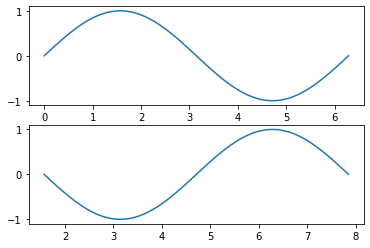

In [10]:
x1 = np.linspace(0, np.pi*2, 100)
x2 = np.linspace(np.pi * 0.5, np.pi*2.5, 100)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(x1, np.sin(x1))
plt.subplot(2, 1, 2)
plt.plot(x2, np.cos(x2))
plt.show()

## Plotting with object-oriented style: object method interface

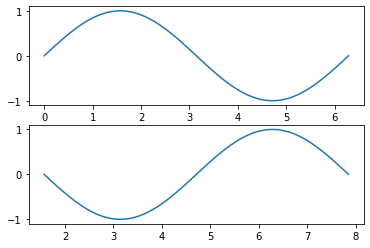

In [11]:
fig, axes = plt.subplots(2, 1)
axes[0].plot(x1, np.sin(x1))
axes[1].plot(x2, np.cos(x2))
plt.show()

## We will adapt the object-oriented style.

## The general steps

## The general steps to create plots are:

1. Creating arrays.
2. Generating figure and axes objects(respectively or simultaneously).
3. Calling various methods of axes object to generate main plot.
4. Calling various methods of axes object to add elements.
5. Show or save plots.

## Creating arrays

In [12]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

## Generating figure and axes objects respectively

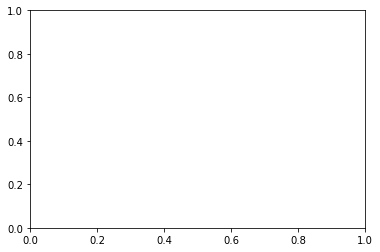

In [13]:
fig = plt.figure()
ax = plt.axes()

## Generating figure and axes objects simultaneously

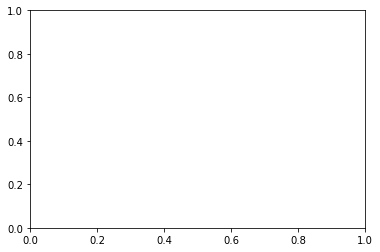

In [14]:
fig, ax = plt.subplots()

## Calling various methods of axes object to generate main plot

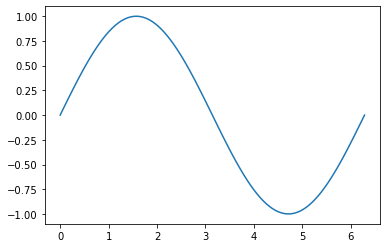

In [15]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y)

## Calling various methods of axes object to add elements

Text(0.5, 0, 'x')

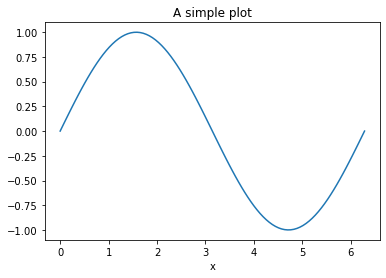

In [16]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y)
ax.set_title('A simple plot')
ax.set_xlabel('x')

## Show plots

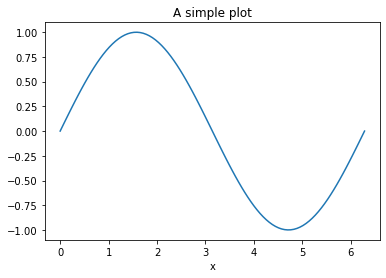

In [17]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y)
ax.set_title('A simple plot')
ax.set_xlabel('x')
plt.show()

## Save plots

Various format is supported.

In [18]:
fig = plt.figure()
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

<Figure size 432x288 with 0 Axes>

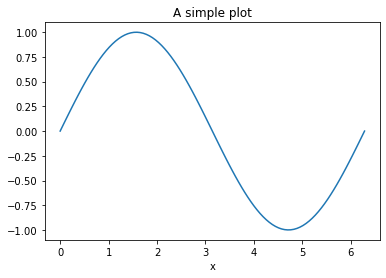

In [19]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y)
ax.set_title('A simple plot')
ax.set_xlabel('x')
fig.savefig('a_simple_plot.png')

## Different methods for different plot types

- `scatter()` for scatter plots.
- `hist()` for histograms.
- `plot()` for lines.
- `bar()` for bar plots.
- `imshow()` for showing images in `ndarray` format.
- ...etc.

In [20]:
def get_latest_daily_report():
    today = date.today()
    day_delta = timedelta(days=1)
    data_date = today
    while True:
        data_date_str = date.strftime(data_date, '%m-%d-%Y')
        print("Try importing {} data...".format(data_date_str))
        daily_report_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{}.csv".format(data_date_str)
        try:
            daily_report = pd.read_csv(daily_report_url)
            print("Successfully imported {} data!".format(data_date_str))
            break
        except HTTPError:
            data_date -= day_delta
    return daily_report

daily_report = get_latest_daily_report()

Try importing 12-16-2021 data...
Try importing 12-15-2021 data...
Successfully imported 12-15-2021 data!


## `scatter` for scatter plots

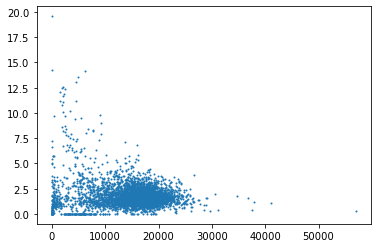

In [21]:
x = daily_report["Incident_Rate"].values
y = daily_report["Case_Fatality_Ratio"].values
fig = plt.figure()
ax = plt.axes()
ax.scatter(x, y, s=1)
plt.show()

## `hist` for histograms

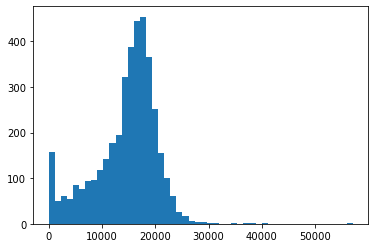

In [22]:
x = daily_report["Incident_Rate"].values # cases per 100,000 persons
fig = plt.figure()
ax = plt.axes()
ax.hist(x, bins=50)
plt.show()

In [23]:
def get_confirmed_time_series():
    request_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
    time_series = pd.read_csv(request_url)
    id_cols = time_series.columns[:4]
    time_series_long = pd.melt(time_series, id_vars=id_cols, var_name='Date', value_name='Confirmed')
    date = pd.to_datetime(time_series_long['Date'])
    time_series_long = time_series_long.drop('Date', axis=1)
    time_series_long.insert(4, 'Date', date)
    groupby_series = time_series_long.groupby(['Country/Region', 'Date'])['Confirmed'].sum()
    out = pd.DataFrame(groupby_series).reset_index()
    return out

confirmed_time_series = get_confirmed_time_series()

## `plot` for lines

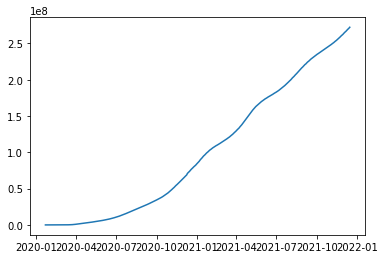

In [24]:
global_ts = confirmed_time_series.groupby("Date")["Confirmed"].sum()
x = global_ts.index
y = global_ts.values
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y)
plt.show()

## `bar` for vertical bar plots

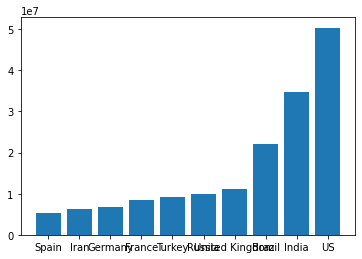

In [25]:
world_top_ten = daily_report.groupby('Country_Region')['Confirmed'].sum().sort_values()[-10:]
fig = plt.figure()
ax = plt.axes()
x = world_top_ten.index
height = world_top_ten.values
ax.bar(x, height)
plt.show()

## `barh` for horizontal bar plots

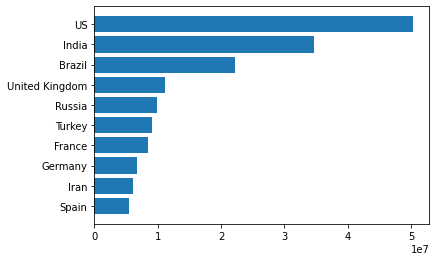

In [26]:
fig = plt.figure()
ax = plt.axes()
y = world_top_ten.index
width = world_top_ten.values
ax.barh(y, width)
plt.show()

## Techniques for adding elements

## How to add title and axis labels

- `set_title` to add title.
- `set_xlabel` to add x-axis label.
- `set_ylabel` to add y-axis label.

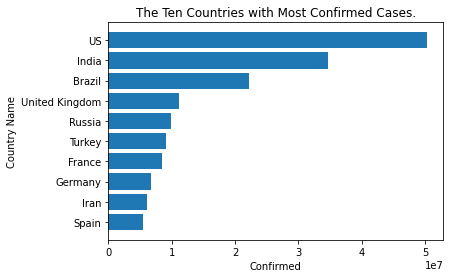

In [27]:
fig = plt.figure()
ax = plt.axes()
y = world_top_ten.index
width = world_top_ten.values
ax.barh(y, width)
ax.set_title('The Ten Countries with Most Confirmed Cases.')
ax.set_xlabel('Confirmed')
ax.set_ylabel('Country Name')
plt.show()

## How to adjust axis ticks

- `set_xticks` to adjust x-axis ticks.
- `set_yticks` to adjust y-axis ticks.

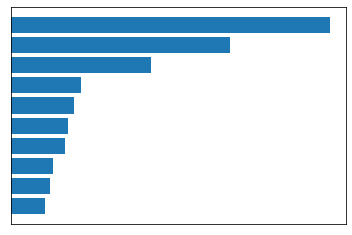

In [28]:
fig = plt.figure()
ax = plt.axes()
y = world_top_ten.index
width = world_top_ten.values
ax.barh(y, width)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

## How to adjust axis tick labels

- `set_xticklabels` to adjust x-axis tick labels.
- `set_yticklabels` to adjust y-axis tick labels.

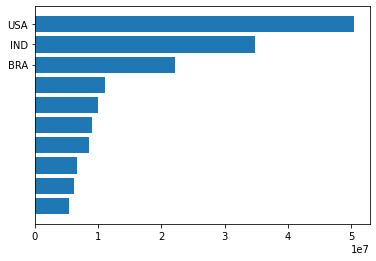

In [29]:
fig = plt.figure()
ax = plt.axes()
y = world_top_ten.index
width = world_top_ten.values
ax.barh(y, width)
ax.set_yticks([7, 8, 9])
ax.set_yticklabels(["BRA", "IND", "USA"])
plt.show()

## How to adjust axis limits

- `set_xlim` to adjust the upper/lower limits of x-axis.
- `set_ylim` to adjust the upper/lower limits of y-axis.

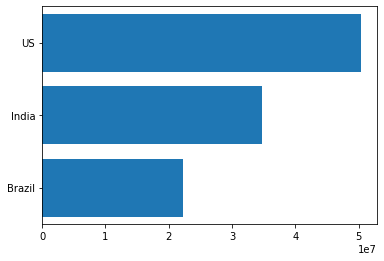

In [30]:
fig = plt.figure()
ax = plt.axes()
y = world_top_ten.index
width = world_top_ten.values
ax.barh(y, width)
ax.set_ylim(6.5, 9.5)
plt.show()

## How to add texts

`text(x, y, 'Some Strings')` to add `'Some Strings'` at (x, y).

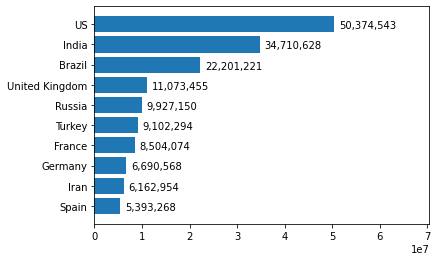

In [31]:
fig = plt.figure()
ax = plt.axes()
ax.barh(world_top_ten.index, world_top_ten.values)
for i in range(world_top_ten.size):
    v = world_top_ten.values[i]
    ax.text(v + 1000000, i - 0.2, "{:,}".format(v))
ax.set_xlim(0, world_top_ten.max() + 2e7)
plt.show()

## How to add legends

`legend()` and `label` parameter to add a legend to indicate categories.

In [32]:
def plot_lines_with_legends(country_names, ts_df):
    fig = plt.figure()
    ax = plt.axes()
    for country in country_names:
        country_data = ts_df[ts_df['Country/Region'].str.contains(country)]
        x = country_data['Date']
        y = country_data['Confirmed']
        ax.plot(x, y, label=country)
    ax.set_xlabel('Date')
    ax.set_title('Cumulative COVID-19 confirmed cases')
    ax.legend()
    plt.show()

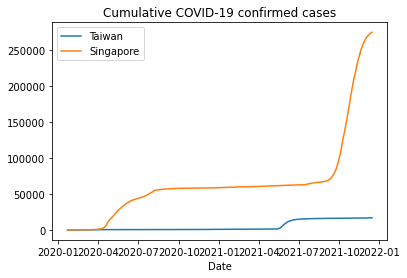

In [33]:
plot_lines_with_legends(['Taiwan', 'Singapore'], confirmed_time_series)

## How to solve the problem that matplotlib supporting only English and European fonts?

/Users/kuoyaojen/opt/miniconda3/envs/pyds/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32047 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kuoyaojen/opt/miniconda3/envs/pyds/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 35336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kuoyaojen/opt/miniconda3/envs/pyds/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30906 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kuoyaojen/opt/miniconda3/envs/pyds/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 35386 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kuoyaojen/opt/miniconda3/envs/pyds/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, fla

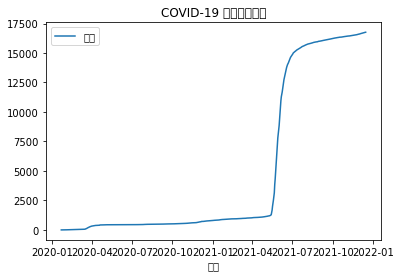

In [34]:
fig = plt.figure()
ax = plt.axes()
tw = confirmed_time_series[confirmed_time_series['Country/Region'].str.contains('Taiwan')]
ax.plot(tw['Date'].values, tw['Confirmed'].values, label='台灣')
ax.set_title('COVID-19 累計確診人數')
ax.set_xlabel('日期')
ax.legend()
plt.show()

## Calling `FontProperties` function from `matplotlib.font_manager`

In [35]:
from matplotlib.font_manager import FontProperties

my_font = FontProperties(fname="/System/Library/Fonts/STHeiti Light.ttc") # Specify a font supporting Chinese

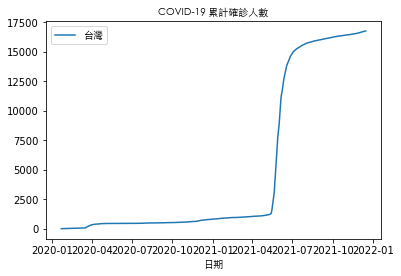

In [36]:
fig = plt.figure()
ax = plt.axes()
tw = confirmed_time_series[confirmed_time_series['Country/Region'].str.contains('Taiwan')]
ax.plot(tw['Date'].values, tw['Confirmed'].values, label='台灣')
ax.set_title('COVID-19 累計確診人數', fontproperties=my_font)
ax.set_xlabel('日期', fontproperties=my_font)
ax.legend(prop=my_font)
plt.show()

## How to create a subplot grid?

- `subplots(m, n)` to create a `ndarray` with a shape `(m, n)`.
- There are (m, n) axes objects inside the `ndarray`.
- Access axes objects through `[m, n]`.

<class 'numpy.ndarray'>
(2, 3)


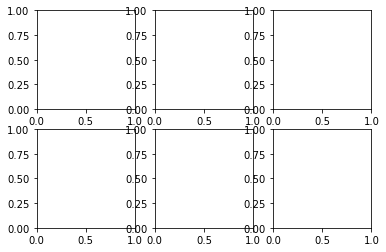

In [37]:
fig, axes = plt.subplots(2, 3)
print(type(axes))
print(axes.shape)

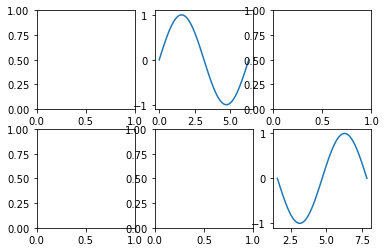

In [38]:
x_sin = np.linspace(0, 2*np.pi, 100)
x_cos = np.linspace(0.5*np.pi, 2.5*np.pi, 100)
y_sin = np.sin(x_sin)
y_cos = np.cos(x_cos)
fig, axes = plt.subplots(2, 3)
axes[0, 1].plot(x_sin, y_sin)
axes[1, 2].plot(x_cos, y_cos)
plt.show()